In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
df.shape

(50, 5)

<Axes: >

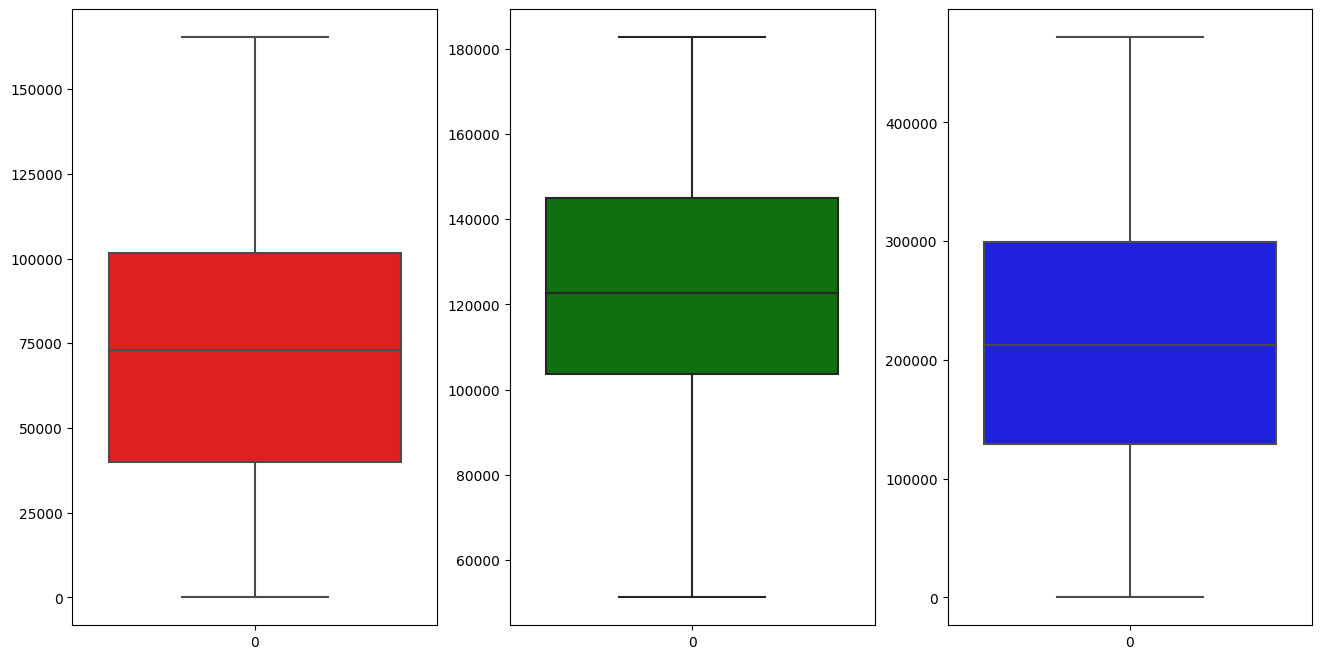

In [7]:
# check outlier 
fig, ax = plt.subplots(1, 3, figsize=(16,8))
sns.boxplot(df['R&D Spend'], ax=ax[0], color='red')
sns.boxplot(df['Administration'], ax=ax[1], color='green')
sns.boxplot(df['Marketing Spend'], ax=ax[2], color='blue')

Text(0.5, 1.0, 'Marketing Spend Distribution')

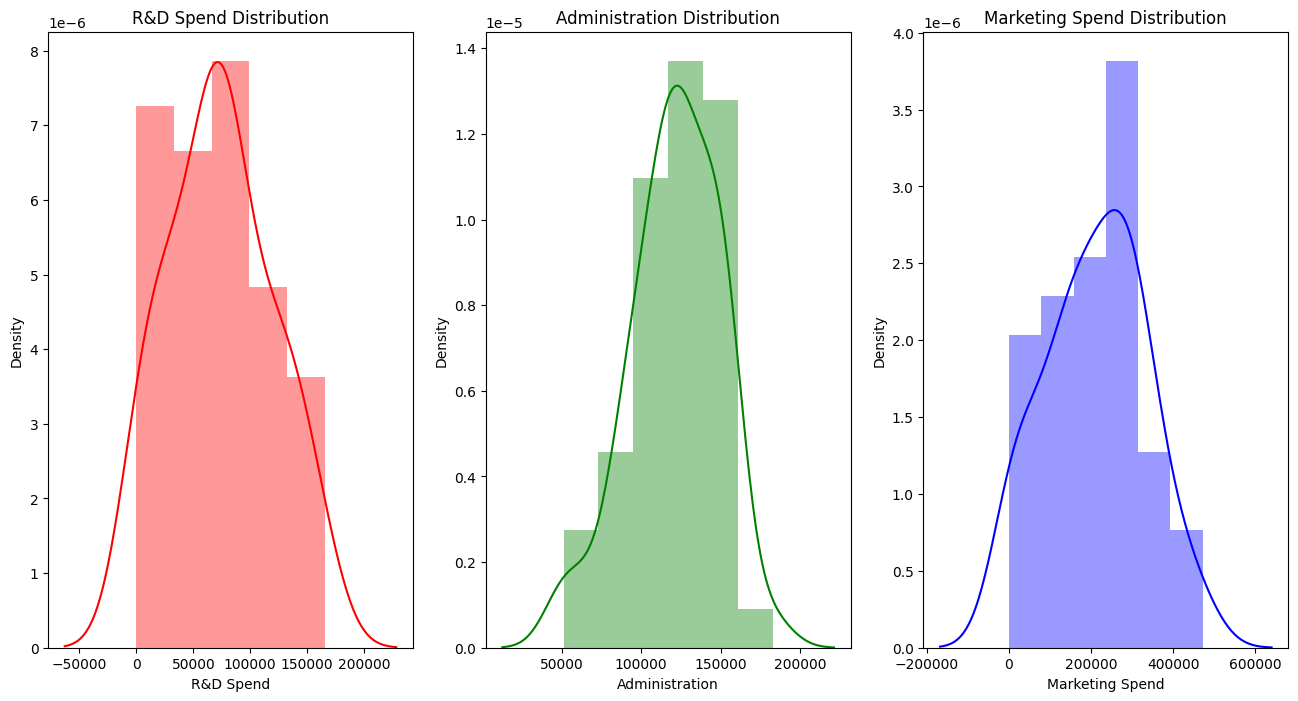

In [8]:
# check distribution
fig, ax = plt.subplots(1, 3, figsize=(16,8))
plt.subplot(131)
sns.distplot(df['R&D Spend'], color='red', kde=True)
plt.title('R&D Spend Distribution')
plt.subplot(132)
sns.distplot(df['Administration'], color='green', kde=True)
plt.title('Administration Distribution')
plt.subplot(133)
sns.distplot(df['Marketing Spend'], color='blue', kde=True)
plt.title('Marketing Spend Distribution')

RESULT :
* Administration column is normally distributed
* R&D Spend and Marketing Spend are almost right skewed

<h3> Check relation between dependent and independent features

Text(0.5, 1.0, 'Marketing Spend')

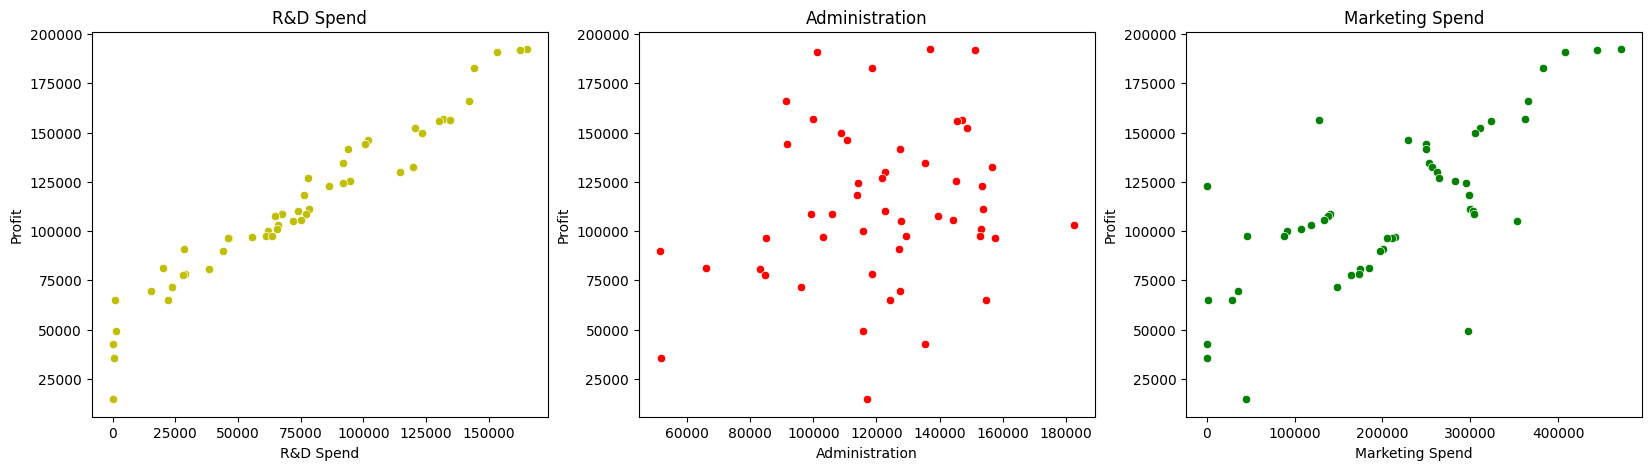

In [9]:
fig,axes=plt.subplots(1,3,figsize=(20,5))
plt.subplot(131)
sns.scatterplot(x=df["R&D Spend"],y=df["Profit"],c="y")
plt.title("R&D Spend")
plt.subplot(132)
sns.scatterplot(x=df["Administration"],y=df["Profit"],c="r")
plt.title("Administration")
plt.subplot(133)
sns.scatterplot(x=df["Marketing Spend"],y=df["Profit"],c="g")
plt.title("Marketing Spend")

RESULT :
* R&D Spend is completely linear
* Administration is not linear
* Marketing Spend is almost linear


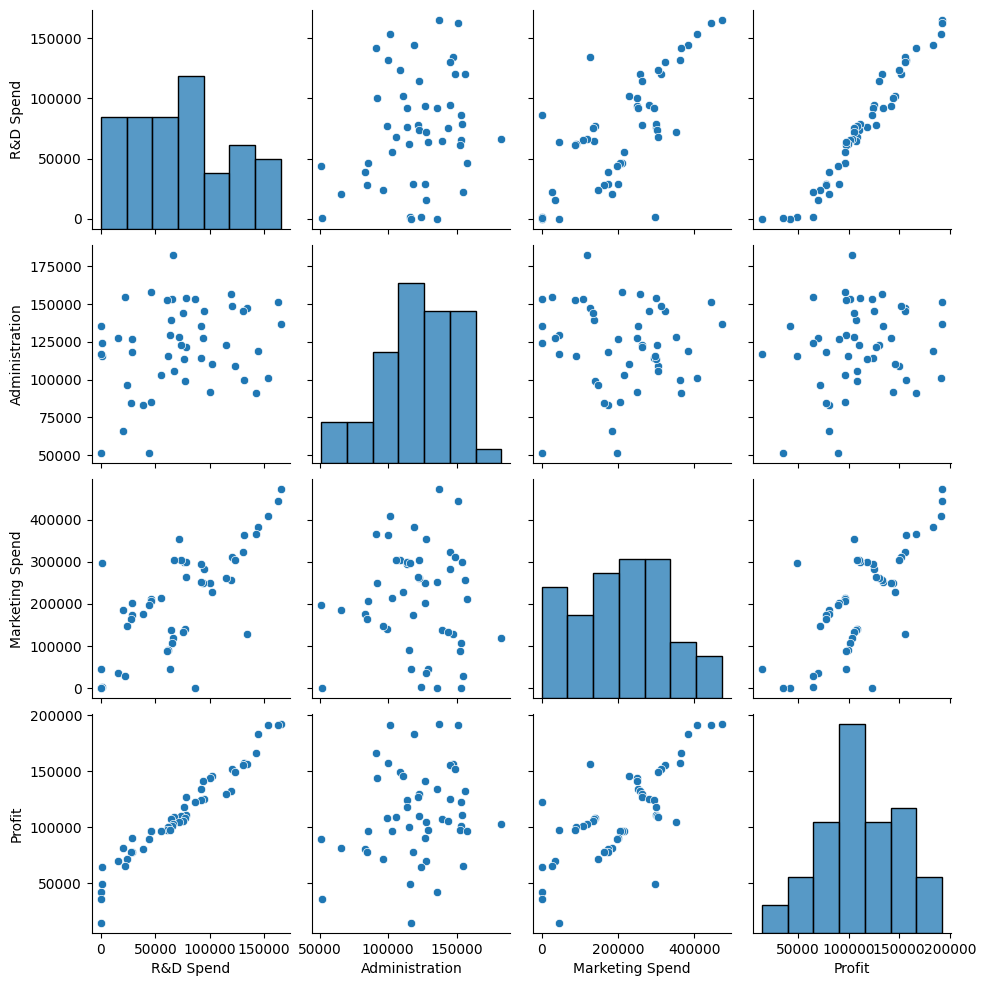

In [10]:
sns.pairplot(df)

<h3> Preprocessing

In [11]:
encoder = LabelEncoder()


df['State'] = encoder.fit_transform(df['State'])

<Axes: >

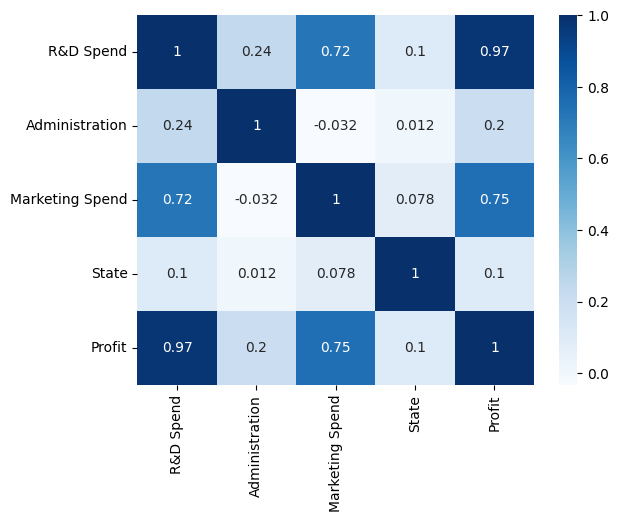

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

RESULT :
* R&D spend and Marketing spend's will play crucial role in our model training as they have 0.97 and 0.75 Coreleation's with Profit's
* But Administration has a Coreleation of only 0.2. So we even if we don't consider that feature, there won't be any problem
* States also dont have much significance, as it has only 0.1 Coreleation which is almost Zero. So we can Remove that Feature

<h3> Split data into dependent and independent features</h3>

In [13]:
X = df.drop(['Profit'], axis=1)
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

<h3>Building model</h3>

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

eval = {}
eval['MAE'] = mean_absolute_error(y_test, y_pred)
eval['MSE'] = mean_squared_error(y_test, y_pred)
eval['RMSE'] = np.sqrt(eval['MSE'])
eval

{'MAE': 6979.175746721378, 'MSE': 80929465.49097753, 'RMSE': 8996.080562721609}

In [15]:
X = df.drop(['Profit', 'Administration', 'State'], axis=1)
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

In [16]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

eval = {}
eval['MAE'] = mean_absolute_error(y_test, y_pred)
eval['MSE'] = mean_squared_error(y_test, y_pred)
eval['RMSE'] = np.sqrt(eval['MSE'])
eval

{'MAE': 6469.181721468585, 'MSE': 67343832.58979604, 'RMSE': 8206.32881316585}

In [17]:
d1={}
r2=r2_score(y_test,y_pred)
d1["r2"]=r2

nminusone=len(X_test)-1
nminuspminus1=(len(X_test)-len(X.columns)-1)

adjusted_r2= 1 - ((1 - r2) * (nminusone) / (nminuspminus1))


d1["adjusted_r2"]=adjusted_r2
d1

{'r2': 0.9168381183550247, 'adjusted_r2': 0.8930775807421746}

<h3>Try predict</h3>

In [18]:
def predict():
    a=float(input("Enter R&D Spend:"))
    b=float(input("Enter R&D Spend:"))
    ans=lr.predict([[a,b]])
    print("Your Profit Might be ",ans)

predict()

Your Profit Might be  [46333.61474983]


In [20]:
# dataframe actual and predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.T

,13,39,30,45,17,48,26,25,32,19
Actual,134307.350000,81005.760000,99937.590000,64926.080000,125370.370000,35673.410000,105733.540000,107404.340000,97427.840000,122776.860000
Predicted,127521.386041,82615.074115,97683.246234,46400.656776,130782.536119,45967.020525,109813.190619,101612.689214,97023.640139,113241.365758


The prediction dataframe is good enough